# 🤝 Supplier / Vendor Analysis — Sourcing, Performance & Risk
This notebook performs EDA, contract expiry checks, supplier scoring and segmentation, and exports actionable lists.

In [1]:
# STEP 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)


In [2]:
# STEP 2: Load data
df = pd.read_csv('D:/Desktop/GenAI-Powered Analytics Platform/Data/raw/supplier_data.csv', parse_dates=['contract_start','contract_end'])
print('Shape:', df.shape)
df.head()


Shape: (20000, 10)


,supplier_id,supplier_name,region,country,contact_email,contract_start,contract_end,on_time_delivery_rate,quality_score,total_orders_supplied
0,0,:,Asia Pacific,suppliercountry_i9{_a,:,2019-12-03,2026-01-12,0.83,0.88,3086
1,contact,0,Middle East & Africa,:00end-id-,NaN,2020-04-03,2025-07-31,0.88,0.82,767
2,00,data:,Europe,{,contractdelivery,2021-04-18,2024-03-01,0.88,0.83,2438
3,__start19,data_time9,Europe,",",:,2021-07-09,2024-01-24,0.82,0.81,673
4,_ 0region_orderssupplieds,400,Latin America,00email.,,2018-05-12,2025-01-29,0.93,0.86,540


In [3]:
# STEP 3: Data quality
print('Missing values:\n', df.isnull().sum())
print('Duplicate rows:', df.duplicated().sum())
df.describe(include='all').T


Missing values:
 supplier_id              1362
supplier_name            1413
region                      0
country                  1336
contact_email            1320
contract_start              0
contract_end                0
on_time_delivery_rate       0
quality_score               0
total_orders_supplied       0
dtype: int64
Duplicate rows: 0


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
supplier_id,18638,9060,:,2511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
supplier_name,18587,8991,:,2612,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,20000,5,Europe,6300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,18664,9030,:,2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact_email,18680,9074,:,2534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contract_start,20000,NaN,NaN,NaN,2019-10-13 06:18:47.520000256,2018-05-10 00:00:00,2018-10-18 00:00:00,2019-08-21 00:00:00,2020-08-18 00:00:00,2021-07-22 00:00:00,NaN
contract_end,20000,NaN,NaN,NaN,2024-02-18 04:20:16.800000,2021-12-01 00:00:00,2023-01-14 00:00:00,2024-03-14 00:00:00,2025-03-06 00:00:00,2026-01-12 00:00:00,NaN
on_time_delivery_rate,20000.0,NaN,NaN,NaN,0.876148,0.82,0.83,0.88,0.93,0.93,0.042886
quality_score,20000.0,NaN,NaN,NaN,0.834542,0.77,0.81,0.84,0.87,0.88,0.038172
total_orders_supplied,20000.0,NaN,NaN,NaN,1533.32165,540.0,872.0,1317.0,2102.0,3120.0,808.232034


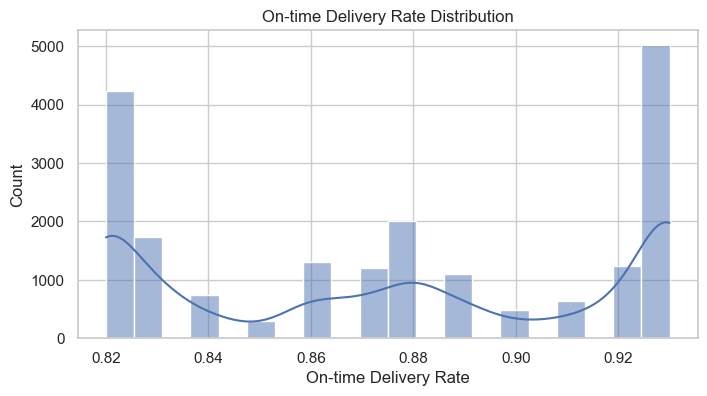

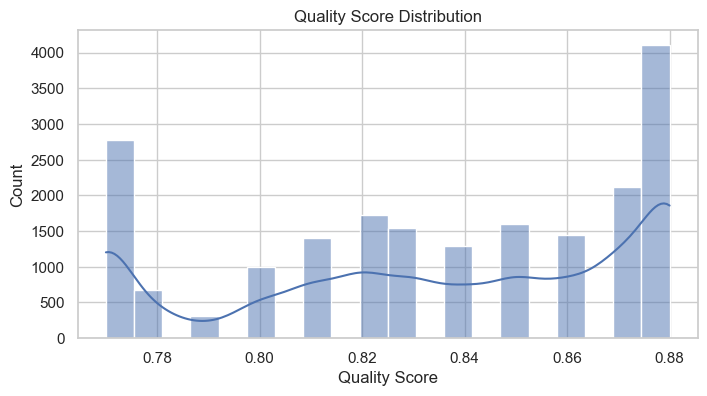

In [4]:
# STEP 4: Performance distributions
plt.figure(figsize=(8,4))
sns.histplot(df['on_time_delivery_rate'].dropna(), bins=20, kde=True)
plt.title('On-time Delivery Rate Distribution')
plt.xlabel('On-time Delivery Rate')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['quality_score'].dropna(), bins=20, kde=True)
plt.title('Quality Score Distribution')
plt.xlabel('Quality Score')
plt.show()


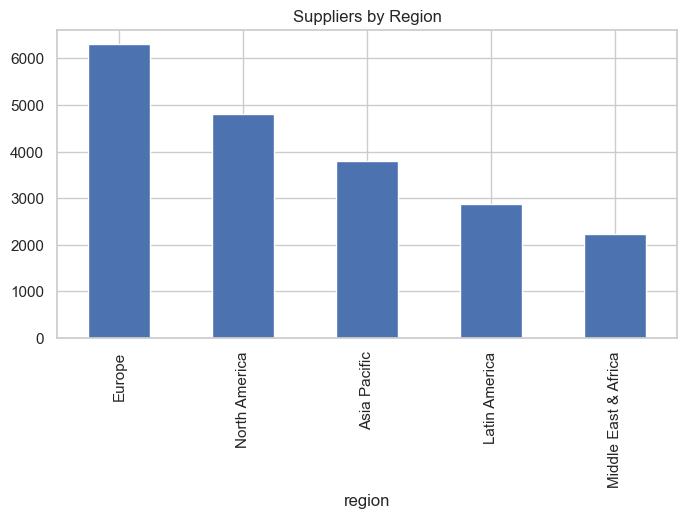

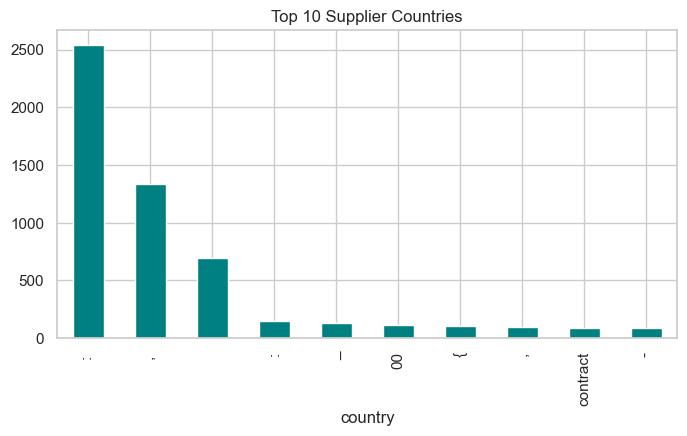

In [5]:
# STEP 5: Regional & country counts
plt.figure(figsize=(8,4))
df['region'].value_counts().plot(kind='bar')
plt.title('Suppliers by Region')
plt.show()

plt.figure(figsize=(8,4))
df['country'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Supplier Countries')
plt.show()


In [6]:
# STEP 6: Contract expiry & risk
today = pd.Timestamp('today').normalize()
df['days_to_contract_end'] = (df['contract_end'] - today).dt.days
expiring_90 = df[df['days_to_contract_end'] <= 90].sort_values('days_to_contract_end')
print('Suppliers with contracts expiring in next 90 days:', expiring_90.shape[0])
expiring_90[['supplier_id','supplier_name','contract_end','days_to_contract_end']].head(20)


Suppliers with contracts expiring in next 90 days: 20000


,supplier_id,supplier_name,contract_end,days_to_contract_end
14,.:,.2,2021-12-01,-1442
2756,}sl:on5regionquality,",",2021-12-01,-1442
18,,rate_:00,2021-12-01,-1442
19997,,":,",2021-12-01,-1442
14894,contract,total_end_00,2021-12-01,-1442
19993,", data8start",start.,2021-12-01,-1442
14903,supplier_on,:: orders4---0,2021-12-01,-1442
14902,"o.s 0,",:,2021-12-01,-1442
2745,contract@_-_}.,contract,2021-12-01,-1442
14842,NaN,aT00,2021-12-01,-1442


In [7]:
# STEP 7: Supplier scoring (simple weighted score)
df_sc = df.copy()
df_sc['on_time_delivery_rate'] = df_sc['on_time_delivery_rate'].fillna(0)
df_sc['quality_score'] = df_sc['quality_score'].fillna(0)
df_sc['order_norm'] = (df_sc['total_orders_supplied'] - df_sc['total_orders_supplied'].min()) / (df_sc['total_orders_supplied'].max() - df_sc['total_orders_supplied'].min())
df_sc['score'] = (0.5 * df_sc['on_time_delivery_rate']) + (0.4 * df_sc['quality_score']) + (0.1 * df_sc['order_norm'])
df_sc['score'] = df_sc['score'].round(3)
df_sc.sort_values('score', ascending=False).head(20)


,supplier_id,supplier_name,region,country,contact_email,contract_start,contract_end,on_time_delivery_rate,quality_score,total_orders_supplied,days_to_contract_end,order_norm,score
17399,T00:5 {,":-,",North America,:_on@,,2018-11-29,2024-12-29,0.93,0.88,3112,-318,0.996899,0.917
14083,"@-,",:,Middle East & Africa,5__,1_{T00,2021-05-01,2023-02-20,0.93,0.88,3108,-996,0.995349,0.917
18570,region:,__9}-_3_a:,North America,contract_-_7_name,supplied_regionorders{contract-:}time._total,2018-07-18,2025-03-24,0.93,0.88,3115,-233,0.998062,0.917
13846,a_,data}}pcontact_delivery,Asia Pacific,":email--email,--,",:0000contract__total:1_,2019-03-22,2025-11-17,0.93,0.88,3117,5,0.998837,0.917
13832,",",score_startid,North America,:,__@delivery,2018-12-01,2024-01-14,0.93,0.88,3119,-668,0.999612,0.917
8564,stime@ 01,"}_namee00country,",Latin America,: {,": rate,_9",2018-05-10,2024-03-17,0.93,0.88,3119,-605,0.999612,0.917
17135,"namesupplier,T00aend-0",_scorerate0_contract}endT00contract8deliveryco...,Europe,",",SUP,2021-07-22,2024-09-20,0.93,0.88,3120,-418,1.000000,0.917
4317,:,", aon6{",North America,:,} 08 00015-_n_}endtotalT0000:00,2019-12-22,2026-01-12,0.93,0.88,3108,61,0.995349,0.917
7006,00_9,total:,North America,contract,", o_0",2019-12-02,2025-12-20,0.93,0.88,3118,38,0.999225,0.917
7010,: {,contract-.9{9_1-1{,North America,quality,0,2018-05-10,2026-01-12,0.93,0.88,3120,61,1.000000,0.917


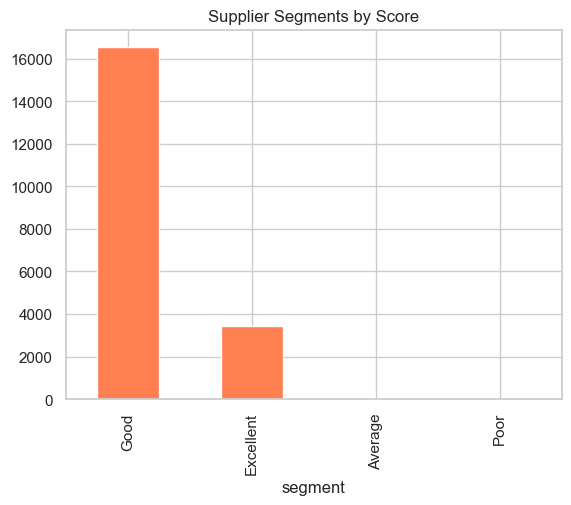

In [8]:
# STEP 8: Segment suppliers by score
bins = [0, 0.5, 0.7, 0.85, 1.0]
labels = ['Poor','Average','Good','Excellent']
df_sc['segment'] = pd.cut(df_sc['score'], bins=bins, labels=labels, include_lowest=True)
df_sc['segment'].value_counts().plot(kind='bar', color='coral')
plt.title('Supplier Segments by Score')
plt.show()


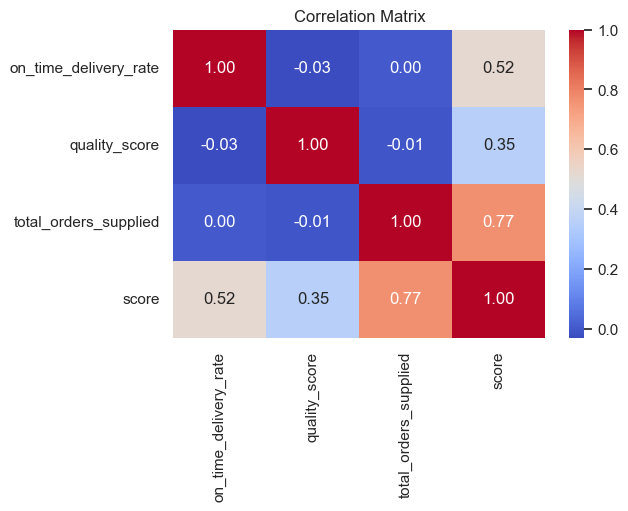

In [9]:
# STEP 9: Correlation between metrics
corr = df_sc[['on_time_delivery_rate','quality_score','total_orders_supplied','score']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [10]:
# STEP 10: Export action lists
df_sc.to_csv('supplier_scored.csv', index=False)
expiring_90.to_csv('suppliers_expiring_90_days.csv', index=False)
print('Exported supplier_scored.csv and suppliers_expiring_90_days.csv')


Exported supplier_scored.csv and suppliers_expiring_90_days.csv


## Next steps / Recommendations
- Start contract renewal outreach for suppliers in `suppliers_expiring_90_days.csv`
- Prioritize `Excellent` segment suppliers for strategic partnerships
- Investigate `Poor` segment suppliers for quality or delivery issues
